# Predicting bankruptcy from financial indicators

<b> Outline of the Project : </b>
    
    1. Data Import 
    2. Exploratory Analysis 
    3. Data Cleaning 
        >Imputation
        >Outlier Detection 
    4. Feature Selection 
    5. Solving Class Imbalance 
    6. Data Modelling 
    7. Hyperparameter Tuning 

In [2]:
#Importing the necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import sklearn.metrics as metrics
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.ensemble import IsolationForest
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#set seaborn as default
sns.set()

In [3]:
#Read the file into a DataFrame: data
data = pd.read_csv('bankruptcy.csv')
#Always create a backup of the file 
data_bkp = pd.read_csv('bankruptcy.csv')

<b> Exploratory Data Analysis </b>

In [4]:
data.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.174190,0.41299,0.14371,1.3480,-28.9820,0.60383,0.219460,1.1225,1.1961,0.46359,...,0.163960,0.375740,0.83604,0.000007,9.7145,6.2813,84.291,4.3303,4.0341,b'0'
1,0.146240,0.46038,0.28230,1.6294,2.5952,0.00000,0.171850,1.1721,1.6018,0.53962,...,0.027516,0.271000,0.90108,0.000000,5.9882,4.1103,102.190,3.5716,5.9500,b'0'
2,0.000595,0.22612,0.48839,3.1599,84.8740,0.19114,0.004572,2.9881,1.0077,0.67566,...,0.007639,0.000881,0.99236,0.000000,6.7742,3.7922,64.846,5.6287,4.4581,b'0'
3,0.024526,0.43236,0.27546,1.7833,-10.1050,0.56944,0.024526,1.3057,1.0509,0.56453,...,0.048398,0.043445,0.95160,0.142980,4.2286,5.0528,98.783,3.6950,3.4844,b'0'
4,0.188290,0.41504,0.34231,1.9279,-58.2740,0.00000,0.233580,1.4094,1.3393,0.58496,...,0.176480,0.321880,0.82635,0.073039,2.5912,7.0756,100.540,3.6303,4.6375,b'0'


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10503 entries, 0 to 10502
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Attr1   10503 non-null  float64
 1   Attr2   10503 non-null  float64
 2   Attr3   10503 non-null  float64
 3   Attr4   10485 non-null  float64
 4   Attr5   10478 non-null  float64
 5   Attr6   10503 non-null  float64
 6   Attr7   10503 non-null  float64
 7   Attr8   10489 non-null  float64
 8   Attr9   10500 non-null  float64
 9   Attr10  10503 non-null  float64
 10  Attr11  10503 non-null  float64
 11  Attr12  10485 non-null  float64
 12  Attr13  10460 non-null  float64
 13  Attr14  10503 non-null  float64
 14  Attr15  10495 non-null  float64
 15  Attr16  10489 non-null  float64
 16  Attr17  10489 non-null  float64
 17  Attr18  10503 non-null  float64
 18  Attr19  10460 non-null  float64
 19  Attr20  10460 non-null  float64
 20  Attr21  9696 non-null   float64
 21  Attr22  10503 non-null  float64
 22

In [6]:
#Covert the class variable to binary integer values 
data['class'] = data['class'].replace(["b'0'","b'1'"],[0,1])
data.dtypes

Attr1     float64
Attr2     float64
Attr3     float64
Attr4     float64
Attr5     float64
           ...   
Attr61    float64
Attr62    float64
Attr63    float64
Attr64    float64
class       int64
Length: 65, dtype: object

In [7]:
data.describe()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
count,10503.000000,10503.000000,10503.000000,10485.000000,1.047800e+04,10503.000000,10503.000000,10489.000000,10500.000000,10503.000000,...,10460.000000,10503.000000,10474.000000,10503.000000,9.911000e+03,10486.000000,1.046000e+04,10485.000000,10275.000000,10503.000000
mean,0.052844,0.619911,0.095490,9.980499,-1.347662e+03,-0.121159,0.065624,19.140113,1.819254,0.366093,...,-0.530082,-0.014817,3.848794,1.429319,5.713363e+02,13.935361,1.355370e+02,9.095149,35.766800,0.047129
std,0.647797,6.427041,6.420056,523.691951,1.185806e+05,6.970625,0.651152,717.756745,7.581659,6.428603,...,55.978608,18.684047,190.201224,77.273270,3.715967e+04,83.704103,2.599116e+04,31.419096,428.298315,0.211926
min,-17.692000,0.000000,-479.730000,0.002080,-1.190300e+07,-508.120000,-17.692000,-2.081800,-1.215700,-479.730000,...,-5691.700000,-1667.300000,-198.690000,-172.070000,0.000000e+00,-6.590300,-2.336500e+06,-0.000156,-0.000102,0.000000
25%,0.000686,0.253955,0.017461,1.040100,-5.207075e+01,0.000000,0.002118,0.431270,1.011275,0.297340,...,0.005137,0.006796,0.875560,0.000000,5.533150e+00,4.486075,4.073700e+01,3.062800,2.023350,0.000000
50%,0.043034,0.464140,0.198560,1.605600,1.579300e+00,0.000000,0.050945,1.111000,1.199000,0.515500,...,0.051765,0.106880,0.953060,0.002976,9.952100e+00,6.677300,7.066400e+01,5.139200,4.059300,0.000000
75%,0.123805,0.689330,0.419545,2.959500,5.608400e+01,0.072584,0.142275,2.857100,2.059100,0.725635,...,0.130010,0.271310,0.995927,0.240320,2.093600e+01,10.587500,1.182200e+02,8.882600,9.682750,0.000000
max,52.652000,480.730000,17.708000,53433.000000,6.854400e+05,45.533000,52.652000,53432.000000,740.440000,11.837000,...,293.150000,552.640000,18118.000000,7617.300000,3.660200e+06,4470.400000,1.073500e+06,1974.500000,21499.000000,1.000000


From the above observation, definitely the data has outliers for most of the features. Before proceeding to visualise the distribution of the data - Data cleaning needs to be done. 

<b> Data Cleaning </b>

In [8]:
#Check for duplicate entries 
data = data.drop_duplicates()
data.info()
#10503 to 10416 entries 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10416 entries, 0 to 10502
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Attr1   10416 non-null  float64
 1   Attr2   10416 non-null  float64
 2   Attr3   10416 non-null  float64
 3   Attr4   10398 non-null  float64
 4   Attr5   10391 non-null  float64
 5   Attr6   10416 non-null  float64
 6   Attr7   10416 non-null  float64
 7   Attr8   10402 non-null  float64
 8   Attr9   10413 non-null  float64
 9   Attr10  10416 non-null  float64
 10  Attr11  10416 non-null  float64
 11  Attr12  10398 non-null  float64
 12  Attr13  10373 non-null  float64
 13  Attr14  10416 non-null  float64
 14  Attr15  10408 non-null  float64
 15  Attr16  10402 non-null  float64
 16  Attr17  10402 non-null  float64
 17  Attr18  10416 non-null  float64
 18  Attr19  10373 non-null  float64
 19  Attr20  10373 non-null  float64
 20  Attr21  9611 non-null   float64
 21  Attr22  10416 non-null  float64
 22

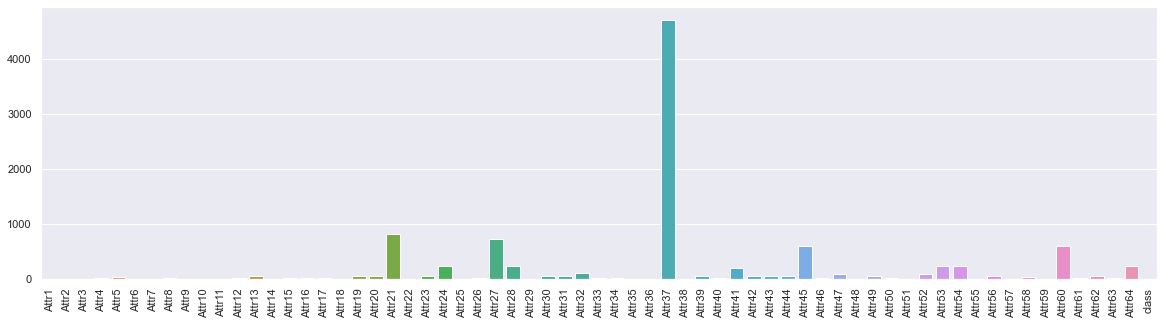

In [9]:
#Dealing with NULL values in the dataset 
plt.figure(figsize=(20,5)) 
sns.barplot(x=data.columns,y=data.isnull().sum())
plt.xticks(rotation='vertical')
plt.show()

The above plot shows the no of NULL values in each column of the dataset,

Theoretically 25% to 30% is the maximum missing values that are allowed. Otherwise, the column is usually dropped from the analysis. 

In [10]:
x = ((data.isnull().sum()/10416)*100).round(2).to_frame().reset_index()
x.columns = x.columns.astype(str)
x.rename(columns={'index': 'Features', '0': 'Percentage of null values'}, inplace=True)
x.sort_values('Percentage of null values',ascending = False).head(10)

,Features,Percentage of null values
36,Attr37,45.15
20,Attr21,7.73
26,Attr27,6.85
44,Attr45,5.65
59,Attr60,5.65
23,Attr24,2.18
52,Attr53,2.16
27,Attr28,2.16
53,Attr54,2.16
63,Attr64,2.16


In [11]:
#Remove Attr 37 column since it has more than 30% NULL values 
data.drop(columns = ['Attr37'], inplace = True)

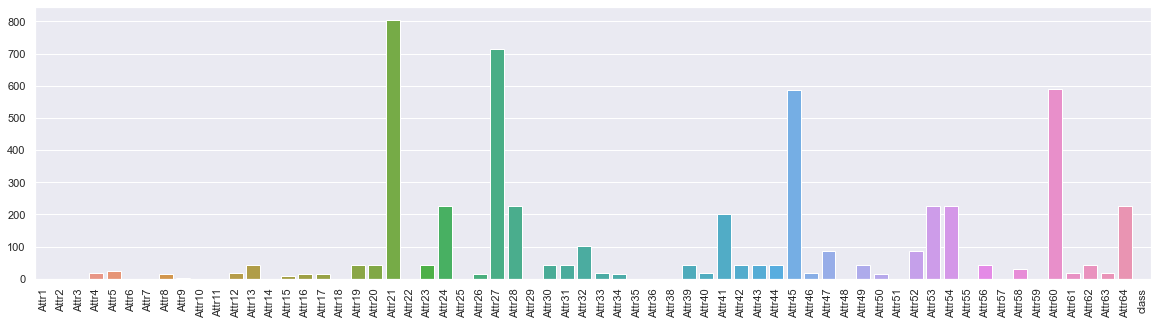

In [12]:
#Replotting the No. of NULls in each column after the removal of Attr 37
plt.figure(figsize=(20,5)) 
sns.barplot(x=data.columns,y=data.isnull().sum())
plt.xticks(rotation='vertical')
plt.show()

<b>Data Imputation</b>

From the above figure, it is evident that there are many missing values. Hence, the next step is to impute.  
Imputation is the process of replacing missing data.

There are different methods to impute data. Since the data to impute is of numerical type, we follow the following techniques - 

Mean, Median, Mode imputation 

In [13]:
def mean_imputation (col,df):
    df[col].fillna(df[col].mean(), inplace=True)

def median_imputation (col,df):
    df[col].fillna(df[col].median(), inplace=True)
    
def mode_imputation (col,df):
    df[col].fillna(df[col].mode(), inplace=True)

We pick median imputation since the data is highly skewed which definitely has an impact on the mean. 

Data Imputation must be done seperately when categorical variables are present. Hence, splitting the data based on "CLASS" 
and then performing median imputation

In [49]:
#Class = 0
data_med_0 = data[data['class']==0].copy(deep=True)
#Class = 1
data_med_1 = data[data['class']==1].copy(deep=True)
for i in data_med_0.columns :
    median_imputation(i,data_med_0) 
    median_imputation(i,data_med_1)

data_imputed = pd.concat([data_med_0,data_med_1])
data_imputed['Attr1'].count()

10416

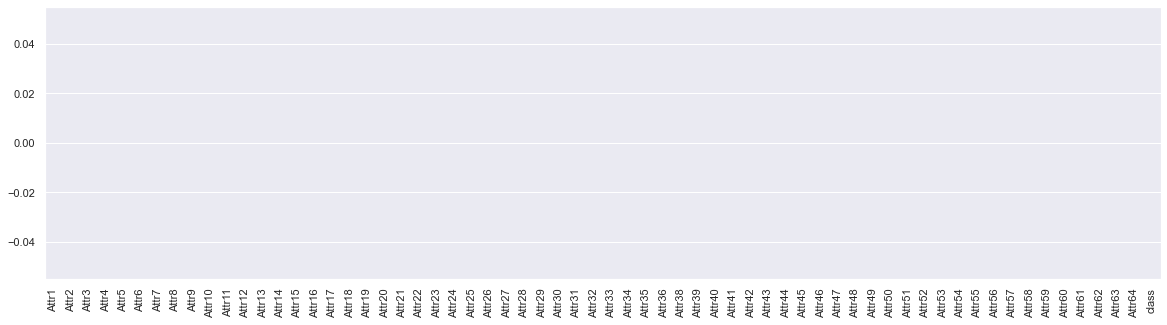

In [50]:
#Replotting the No. of NULls in each column 
plt.figure(figsize=(20,5)) 
sns.barplot(x=data_imputed.columns,y=data_imputed.isnull().sum())
plt.xticks(rotation='vertical')
plt.show()

<b> Outlier Detection </b>

In [52]:
data_imputed.describe()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
count,10416.000000,10416.000000,10416.000000,10416.000000,1.041600e+04,10416.000000,10416.000000,10416.000000,10416.000000,10416.000000,...,10416.000000,10416.000000,10416.000000,10416.000000,1.041600e+04,10416.000000,1.041600e+04,10416.000000,10416.000000,10416.000000
mean,0.052905,0.621781,0.094550,10.017263,-1.356062e+03,-0.123138,0.065695,16.397947,1.824121,0.364329,...,-0.532883,-0.015315,3.865208,1.435625,5.440655e+02,13.983653,1.353483e+02,9.112416,35.306826,0.047331
std,0.650356,6.453747,6.446757,525.423257,1.189329e+05,6.999619,0.653707,659.208367,7.611757,6.455319,...,56.096709,18.761519,190.729965,77.594491,3.624779e+04,83.980604,2.604600e+04,31.519076,425.399698,0.212356
min,-17.692000,0.000000,-479.730000,0.002080,-1.190300e+07,-508.120000,-17.692000,-2.081800,-1.215700,-479.730000,...,-5691.700000,-1667.300000,-198.690000,-172.070000,0.000000e+00,-6.590300,-2.336500e+06,-0.000156,-0.000102,0.000000
25%,0.000665,0.254553,0.017276,1.040575,-5.200975e+01,0.000000,0.002105,0.430470,1.011775,0.296715,...,0.005266,0.006890,0.876217,0.000000,5.737500e+00,4.492450,4.085250e+01,3.066625,2.061900,0.000000
50%,0.043056,0.464850,0.198655,1.606350,1.796750e+00,0.000000,0.051004,1.109850,1.201700,0.514595,...,0.052193,0.107275,0.952970,0.002706,1.001950e+01,6.680650,7.038800e+01,5.151050,4.081700,0.000000
75%,0.123867,0.690967,0.419793,2.952025,5.612775e+01,0.070849,0.142415,2.838950,2.066775,0.724762,...,0.129197,0.271785,0.995900,0.240545,1.987100e+01,10.625500,1.179825e+02,8.883475,9.501075,0.000000
max,52.652000,480.730000,17.708000,53433.000000,6.854400e+05,45.533000,52.652000,53432.000000,740.440000,11.837000,...,293.150000,552.640000,18118.000000,7617.300000,3.660200e+06,4470.400000,1.073500e+06,1974.500000,21499.000000,1.000000


From the above table, it is clear that we have many outliers. Therefore, our next step is to detect and treat outliers. 

1. Box Plot Method 

Steps to perform Outlier Detection by identifying the lowerbound and upperbound of the data:

    1. Arrange your data in ascending order
    2. Calculate Q1 ( the first Quarter)
    3. Calculate Q3 ( the third Quartile)
    4. Find IQR = (Q3 - Q1)
    5. Find the lower Range = Q1 -(1.5 * IQR)
    6. Find the upper Range = Q3 + (1.5 * IQR)

After identifying the outliers, they are replaced with the Median values of the respective columns.

In [54]:
def IQR_Method(column,df):
    
    median = df[column].median()
    # First quartile (Q1)
    Q1 = np.percentile(df[column], 25, interpolation = 'midpoint')

    # Third quartile (Q3)
    Q3 = np.percentile(df[column], 75, interpolation = 'midpoint')

    # Interquartile Range 
    IQR = Q3-Q1

    #Lower and Upper Bounds
    lower_Range = Q1 -(1.5 * IQR)
    upper_Range = Q3 + (1.5 * IQR)

    #Replace the respective rows with Median
    df.loc[(df[column] > upper_Range) | (df[column] < lower_Range),column]=median

In [55]:
#Class = 0
data_IQR_0 = data_imputed[data_imputed['class']==0].copy(deep=True)
data_IQR_0.drop('class',axis=1,inplace=True)
#Class = 1
data_IQR_1 = data_imputed[data_imputed['class']==1].copy(deep=True)
data_IQR_1.drop('class',axis=1,inplace=True)

for i in data_IQR_0.columns:
    IQR_Method(i,data_IQR_0)
    IQR_Method(i,data_IQR_1)
data_IQR = pd.concat([data_IQR_0,data_IQR_1])
data_IQR['Attr1'].count()

10416

In [56]:
data_IQR.describe()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
count,10416.000000,10416.000000,10416.000000,10416.000000,10416.000000,10416.000000,10416.000000,10416.000000,10416.000000,10416.000000,...,10416.00000,10416.000000,10416.000000,10416.000000,10416.000000,10416.000000,10416.000000,10416.000000,10416.000000,10416.000000
mean,0.054770,0.472219,0.225400,1.802012,2.101886,0.009665,0.064731,1.381013,1.420414,0.511772,...,1407.75059,0.060064,0.125082,0.944344,0.065880,11.027669,7.026548,76.170972,5.608152,4.722712
std,0.089266,0.270531,0.287732,1.151056,70.036817,0.048415,0.102950,1.416191,0.715768,0.268691,...,2574.51631,0.086061,0.179027,0.082811,0.132610,7.848161,3.748219,48.049376,3.583606,3.988738
min,-0.261070,0.000000,-0.691170,0.002080,-234.890000,-0.247110,-0.273970,-2.081800,-0.000084,-0.428190,...,-6596.10000,-0.229940,-0.640800,0.694590,-0.351810,0.000000,-0.014534,0.000000,-0.000156,-0.000102
25%,0.006764,0.254553,0.037856,1.040575,-31.866000,0.000000,0.008764,0.430470,1.011800,0.319810,...,102.54000,0.014140,0.026729,0.906145,0.000000,5.737500,4.493025,40.871000,3.066625,2.061900
50%,0.045430,0.456570,0.206070,1.588800,3.338000,0.000000,0.054372,1.089300,1.197400,0.524690,...,927.95000,0.053754,0.110210,0.951810,0.003105,10.019500,6.679700,69.277000,5.102550,4.081700
75%,0.101410,0.665062,0.418265,2.196550,34.873500,0.000000,0.120552,1.802325,1.768700,0.723760,...,1926.75000,0.099812,0.209583,0.989130,0.062202,12.985250,8.680925,100.960000,7.265200,5.616925
max,0.315010,1.442200,1.000000,5.922700,220.430000,0.203480,0.359710,6.617100,3.920900,1.000000,...,11097.00000,0.317760,0.744110,1.231900,0.801390,41.264000,23.959000,332.330000,17.883000,20.716000


2. Isolation Forest Method 

In [57]:
def Isolation_Forest(df):
    model=IsolationForest(n_estimators=100, max_samples='auto', max_features=1.0)
    model.fit(df)
    df['anomaly']=model.predict(df)
    anomaly=df.loc[df['anomaly']==-1]
    anomaly_index=list(anomaly.index)
    df.drop(df[df['anomaly'] ==-1].index , inplace=True)
    print("\f The total number of anomalities in data is ", len(anomaly))
    

In [59]:
#Class = 0
data_IF_0 = data_imputed[data_imputed['class']==0].copy(deep=True)
data_IF_0.drop('class',axis=1,inplace=True)
Isolation_Forest(data_IF_0)
#Class = 1
data_IF_1 = data_imputed[data_imputed['class']==1].copy(deep=True)
data_IF_1.drop('class',axis=1,inplace=True)
Isolation_Forest(data_IF_1)

 The total number of anomalities in data is  207
 The total number of anomalities in data is  7


In [60]:
data_IF = pd.concat([data_IF_0,data_IF_1])
data_IF['Attr1'].count()

10202

In [61]:
data_IF.describe()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,anomaly
count,10202.000000,10202.000000,10202.000000,10202.000000,1.020200e+04,10202.000000,10202.000000,10202.000000,10202.000000,10202.000000,...,10202.000000,10202.000000,10202.000000,10202.000000,1.020200e+04,10202.000000,1.020200e+04,10202.000000,10202.000000,10202.0
mean,0.055851,0.505953,0.201578,3.000669,-1.358785e+03,0.002778,0.068568,3.064028,1.714477,0.479879,...,0.102514,0.000751,3.272265,1.482670,5.231378e+02,13.342872,-1.207626e+02,7.867269,33.499386,1.0
std,0.178315,0.378995,0.382260,6.201242,1.201541e+05,0.840002,0.188871,10.958695,1.377223,0.408487,...,2.913745,18.730208,184.200900,78.384431,3.649476e+04,78.993593,2.313469e+04,11.485164,401.742518,0.0
min,-2.046600,0.000000,-4.028000,0.006468,-1.190300e+07,-70.966000,-2.046600,-2.081800,-1.215700,-14.928000,...,-13.287000,-1667.300000,-1.328100,-142.790000,0.000000e+00,-0.014534,-2.336500e+06,-0.000156,-0.000102,1.0
25%,0.001374,0.258768,0.020262,1.046225,-5.091850e+01,0.000000,0.003392,0.439715,1.014400,0.301060,...,0.006630,0.007308,0.876725,0.000000,5.743775e+00,4.530250,4.117775e+01,3.101650,2.073800,1.0
50%,0.044030,0.464500,0.199690,1.604800,1.784050e+00,0.000000,0.052405,1.111200,1.203750,0.515055,...,0.052588,0.106610,0.952675,0.004471,1.001950e+01,6.699700,7.032750e+01,5.165300,4.081700,1.0
75%,0.123847,0.685370,0.415747,2.899625,5.492500e+01,0.075123,0.142425,2.774600,2.059475,0.720658,...,0.128937,0.268175,0.994990,0.252333,1.992975e+01,10.569000,1.167900e+02,8.843600,9.482725,1.0
max,3.115500,15.928000,17.708000,239.000000,6.854400e+05,17.113000,2.319800,757.070000,31.417000,11.837000,...,293.150000,552.640000,18118.000000,7617.300000,3.660200e+06,4470.400000,8.591100e+03,508.380000,21499.000000,1.0


<b> Data Visualisation </b>

In [62]:
data_clean = data_IQR.copy()
data_clean['class'] = data_imputed['class']

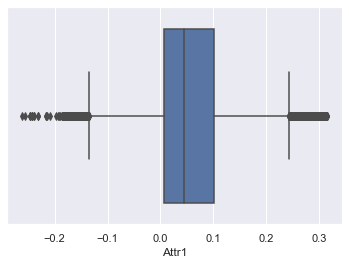

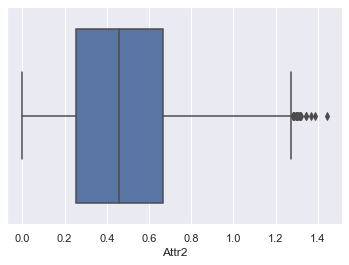

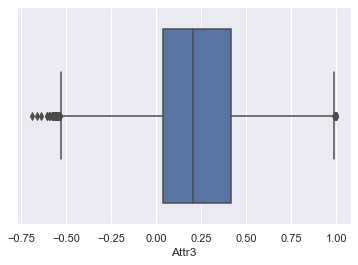

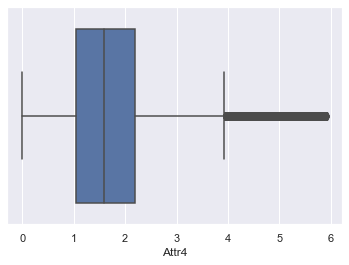

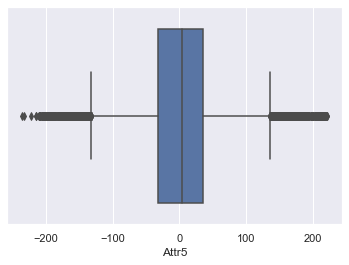

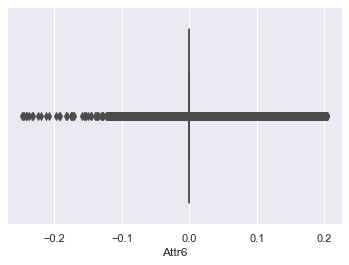

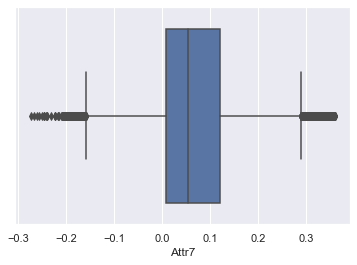

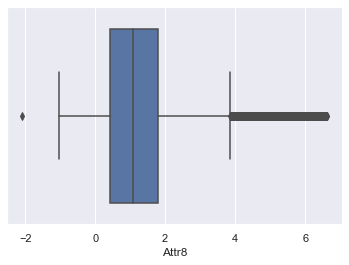

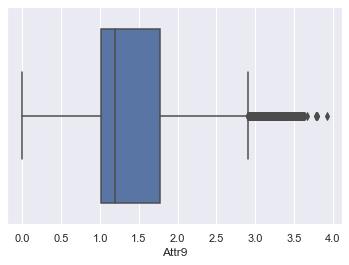

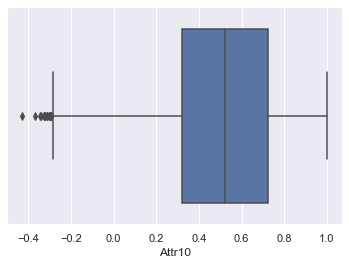

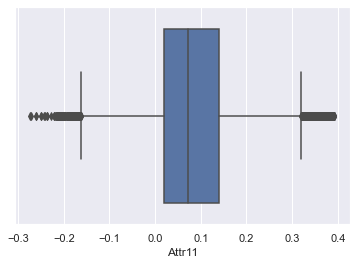

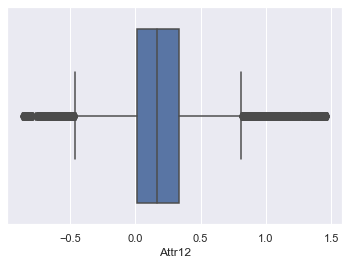

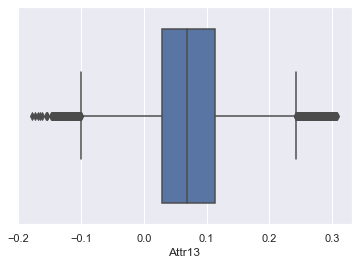

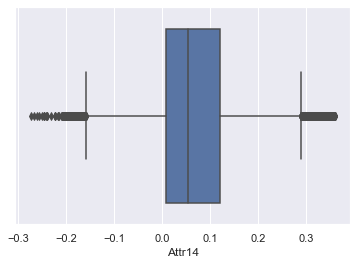

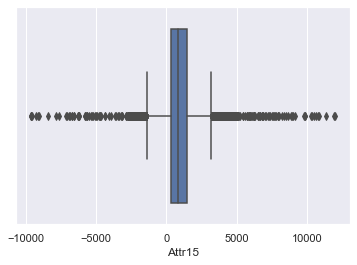

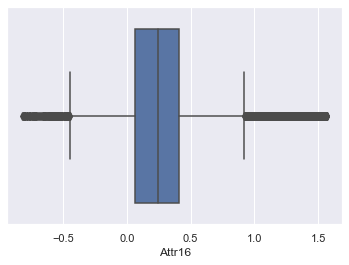

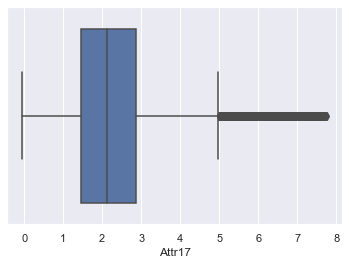

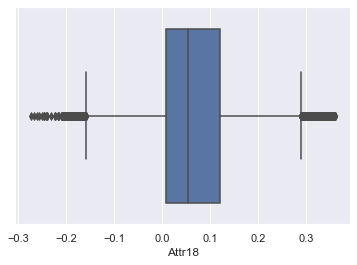

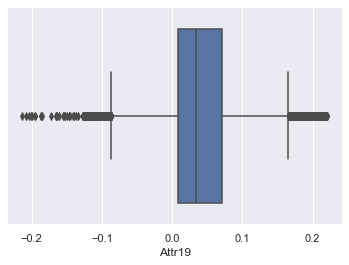

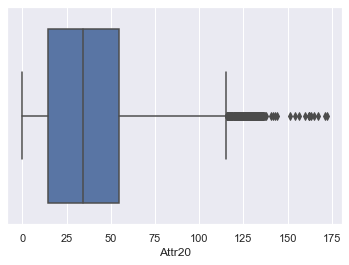

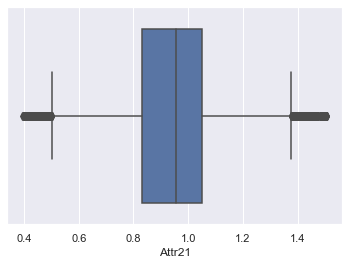

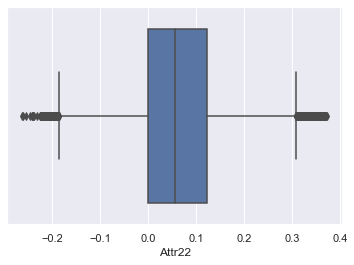

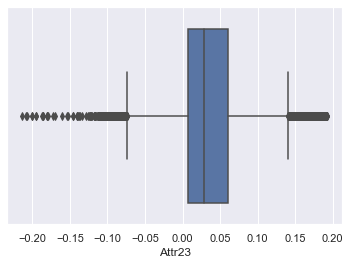

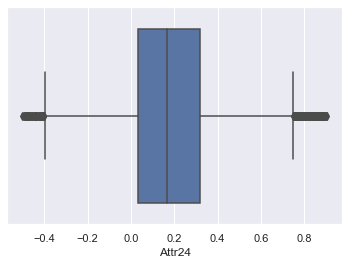

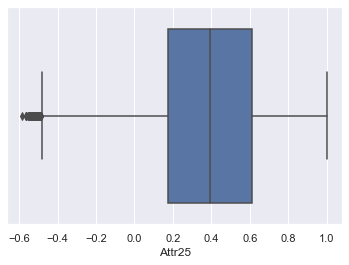

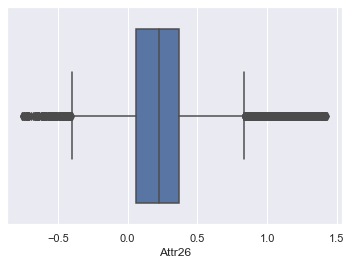

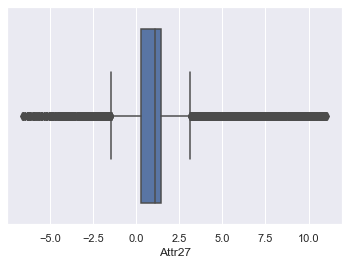

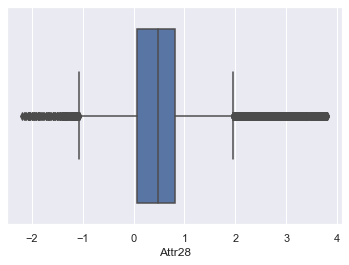

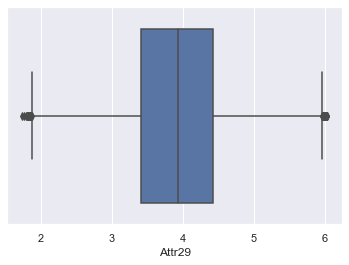

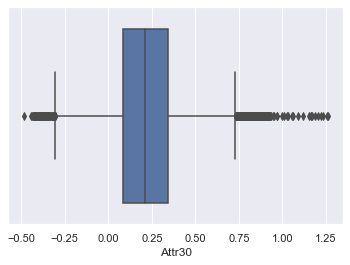

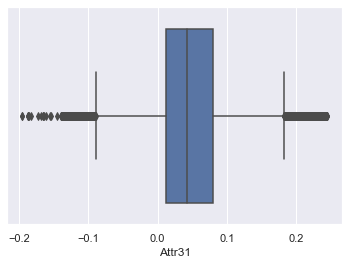

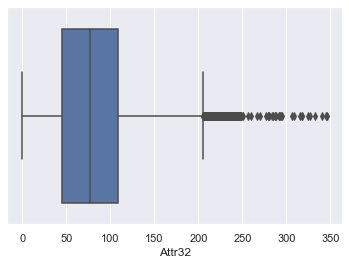

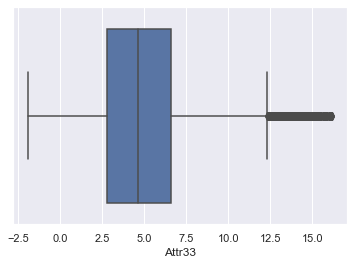

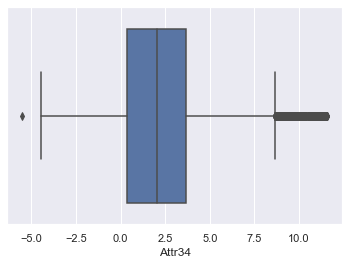

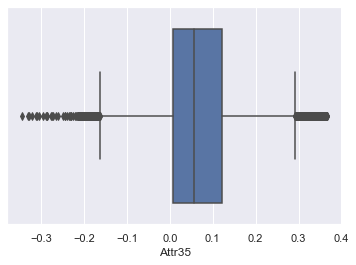

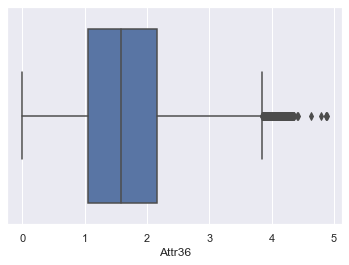

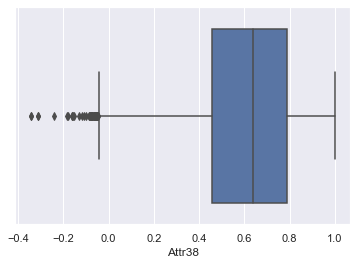

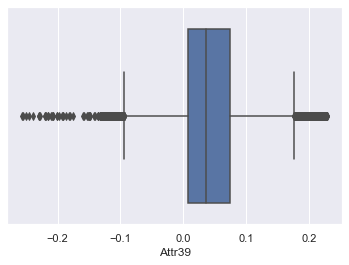

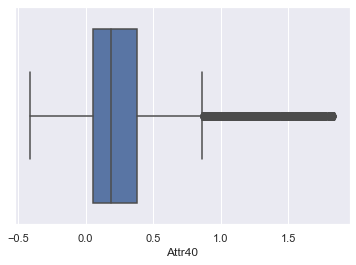

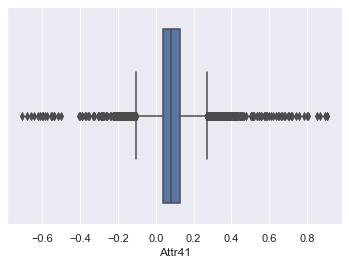

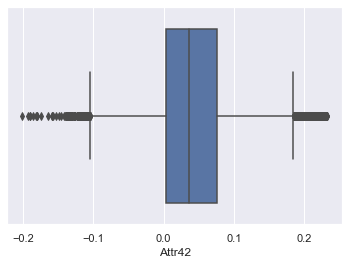

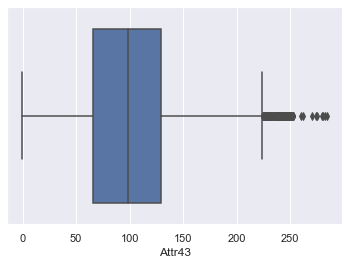

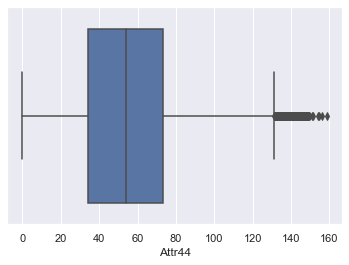

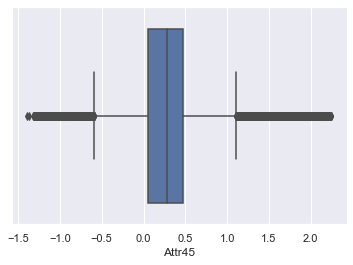

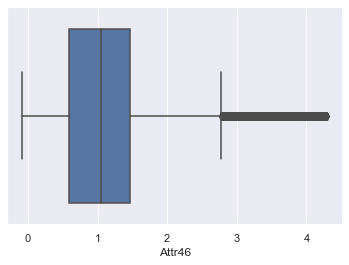

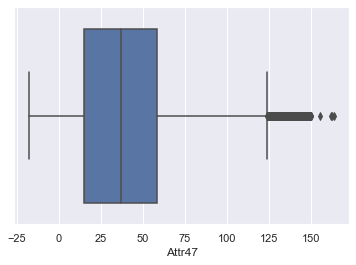

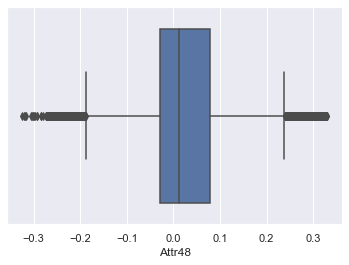

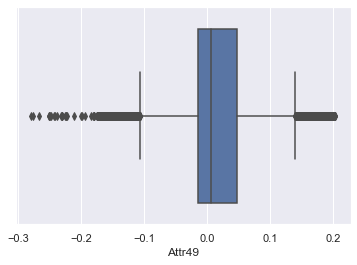

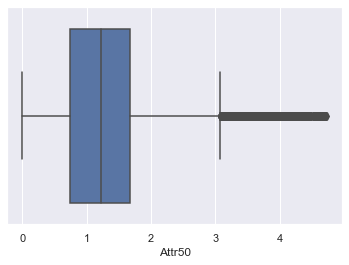

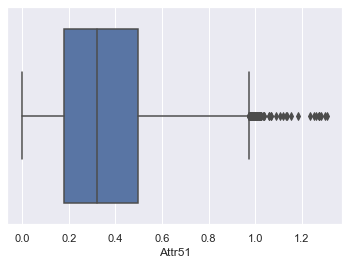

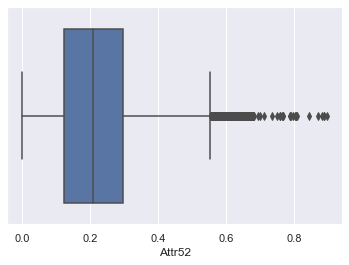

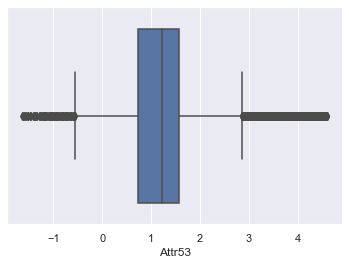

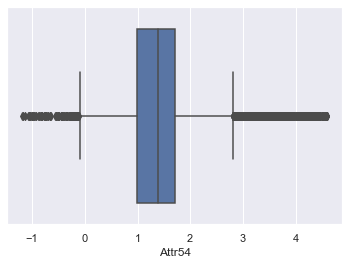

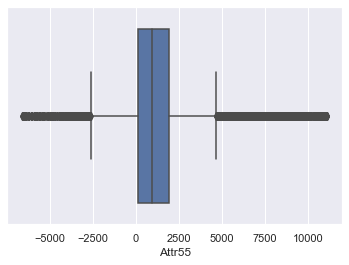

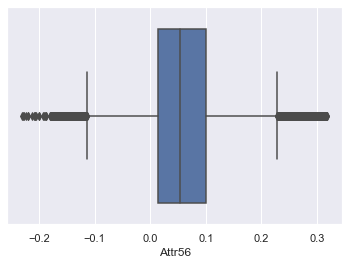

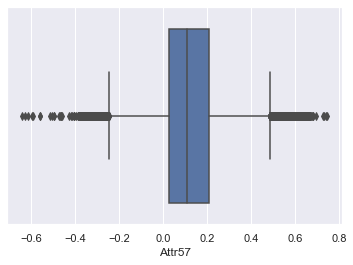

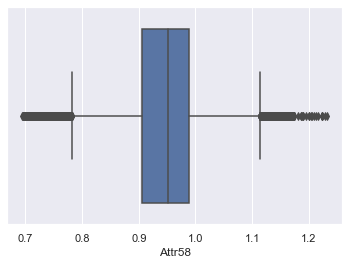

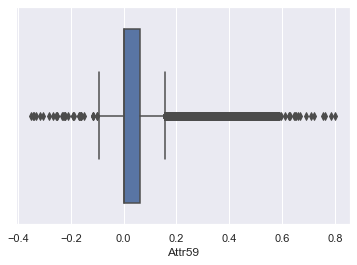

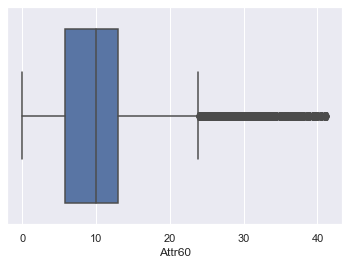

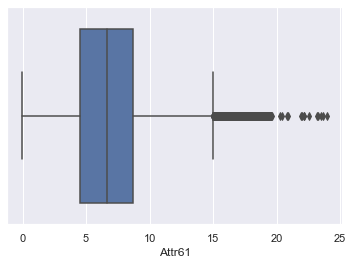

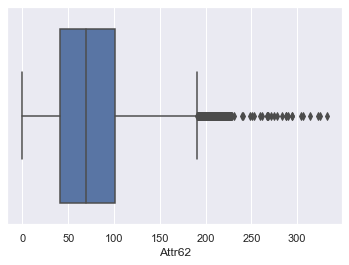

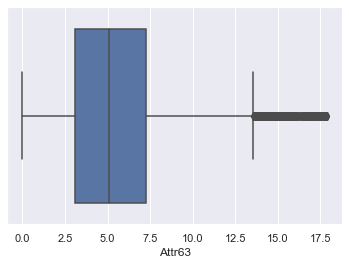

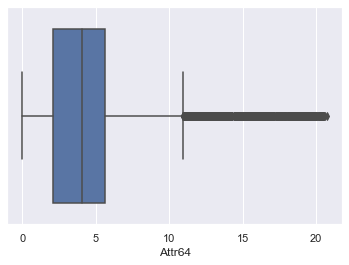

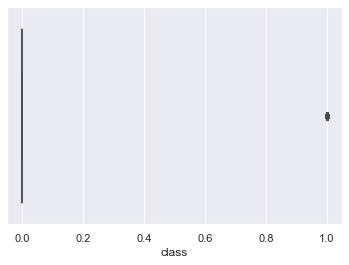

In [63]:
#Box plot for all features in the data 
for i in data_clean.columns:
    sns.boxplot(x=data_clean[i])
    plt.show()

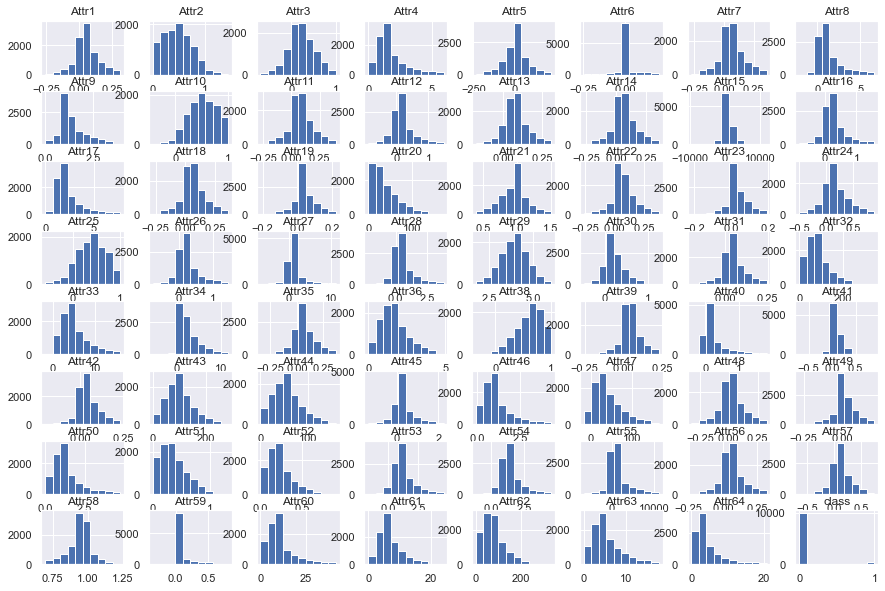

In [64]:
#Distribution of all features in the dataset 
"""for column in data_clean:
    sns.displot(data_clean, x=column, hue="class")
    plt.show()"""

data_clean.hist(figsize=(15, 10))
plt.show()

<b> Data Imbalance </b>

From the below graph, it can be seen that our data is highly imbalanced. That is, Class = 0 has more records compared to Class=1. Here, Class 0 is the majority class and Class 1 is the minority class. 
It is vital to identify the minority classes correctly. So model should not be biased to detect only the majority class but should give equal weight or importance towards the minority class too.

Hence, we can tackle this issue with Resampling technique. 
Therefore, we can oversample the minority class using replacement. This technique is called oversampling.

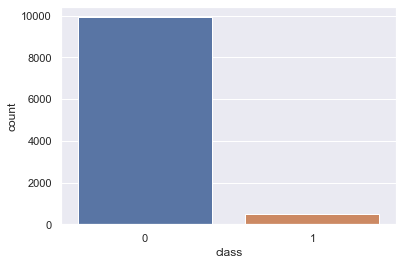

In [26]:
sns.countplot(x=data_clean['class'])
plt.show()

1. Simple Re-sampling 

In [27]:

#create two different dataframe of majority and minority class 
df_majority = data_clean[(data_clean['class']==0)] 
df_minority = data_clean[(data_clean['class']==1)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 9923, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

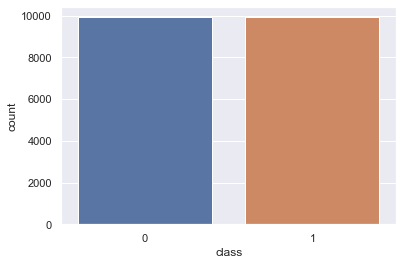

In [28]:
sns.countplot(x=df_upsampled['class'])
plt.show()

2. SMOTE

Synthetic Minority Oversampling Technique or SMOTE is another technique to oversample the minority class. Simply adding duplicate records of minority class often don’t add any new information to the model. In SMOTE new instances are synthesized from the existing data. If we explain it in simple words, SMOTE looks into minority class instances and use k nearest neighbor to select a random nearest neighbor, and a synthetic instance is created randomly in feature space.

In [29]:
# Resampling the minority class. The strategy can be changed as required.
sm = SMOTE(sampling_strategy='minority', random_state=42)
# Fit the model to generate the data.
oversampled_X, oversampled_Y = sm.fit_resample(data_clean.drop('class', axis=1), data_clean['class'])
oversampled = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)

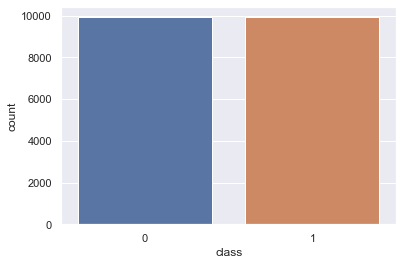

In [30]:
sns.countplot(x=oversampled['class'])
plt.show()

In [31]:
oversampled.head()

,class,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
0,0,0.174190,0.41299,0.14371,1.3480,-28.9820,0.0,0.219460,1.1225,1.1961,...,875.855,0.163960,0.375740,0.83604,0.000007,9.7145,6.2813,84.291,4.3303,4.0341
1,0,0.146240,0.46038,0.28230,1.6294,2.5952,0.0,0.171850,1.1721,1.6018,...,3387.800,0.027516,0.271000,0.90108,0.000000,5.9882,4.1103,102.190,3.5716,5.9500
2,0,0.000595,0.22612,0.48839,3.1599,84.8740,0.0,0.004572,2.9881,1.0077,...,875.855,0.007639,0.000881,0.99236,0.000000,6.7742,3.7922,64.846,5.6287,4.4581
3,0,0.024526,0.43236,0.27546,1.7833,-10.1050,0.0,0.024526,1.3057,1.0509,...,5012.600,0.048398,0.043445,0.95160,0.142980,4.2286,5.0528,98.783,3.6950,3.4844
4,0,0.188290,0.41504,0.34231,1.9279,-58.2740,0.0,0.233580,1.4094,1.3393,...,875.855,0.176480,0.321880,0.82635,0.073039,2.5912,7.0756,100.540,3.6303,4.6375


<b> Feature Selection </b>

ANOVA F Test Method 

An F-statistic, or F-test, is a class of statistical tests that calculate the ratio between variances values, such as the variance from two different samples or the explained and unexplained variance by a statistical test, like ANOVA. The ANOVA method is a type of F-statistic referred to here as an ANOVA f-test.

Importantly, ANOVA is used when one variable is numeric and one is categorical, such as numerical input variables and a classification target variable in a classification task.

The results of this test can be used for feature selection where those features that are independent of the target variable can be removed from the dataset.

In [67]:
# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_classif, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

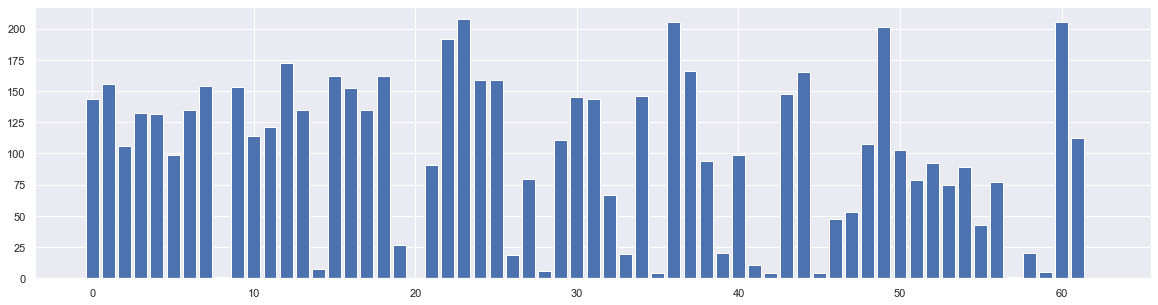

    feature      fscore
23     24.0  207.370014
36     38.0  205.032933
60     62.0  204.957196
49     51.0  201.453549
22     23.0  191.665294
12     13.0  172.809194
37     39.0  166.050179
44     46.0  165.180768
18     19.0  162.253318
15     16.0  161.838249
24     25.0  158.824222
25     26.0  158.565284
1       2.0  155.391715
7       8.0  153.935836
9      10.0  153.076088


In [71]:
X = data_clean.iloc[:,:63]
y = data_clean['class']
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

plt.figure(figsize=(20,5)) 
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

x = np.arange(1,65)
x=np.delete(x,36)

feature_fscore = pd.DataFrame(data=np.column_stack((x,fs.scores_)),columns=['feature','fscore'])
print(feature_fscore.sort_values(by='fscore',ascending = False).head(15))

We shall select the features with highest f scores. However, before proceeding lets look at the correlation among the top 10 features.

Check for Correlation between features. If there is correlation among them, delete the feature with lower f score and bring in the next feature in the list which does not have any correlation with the exisisting features selected. 

In [73]:
# Create correlation matrix
corr_matrix = data_clean.corr().abs()
#Check for correlation more than 0.8 or less than -0.8
high_corr_var=np.where((corr_matrix>0.8) | (corr_matrix<-0.8))
#Zip them in pairs
high_corr_var=[(corr_matrix.columns[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]
high_corr_var

[('Attr1', 'Attr7'),
 ('Attr1', 'Attr11'),
 ('Attr1', 'Attr14'),
 ('Attr1', 'Attr18'),
 ('Attr2', 'Attr10'),
 ('Attr7', 'Attr11'),
 ('Attr7', 'Attr14'),
 ('Attr7', 'Attr18'),
 ('Attr7', 'Attr22'),
 ('Attr8', 'Attr17'),
 ('Attr11', 'Attr14'),
 ('Attr11', 'Attr18'),
 ('Attr11', 'Attr22'),
 ('Attr14', 'Attr18'),
 ('Attr14', 'Attr22'),
 ('Attr16', 'Attr26'),
 ('Attr18', 'Attr22'),
 ('Attr19', 'Attr23'),
 ('Attr19', 'Attr31'),
 ('Attr20', 'Attr47'),
 ('Attr22', 'Attr35'),
 ('Attr22', 'Attr48'),
 ('Attr23', 'Attr31'),
 ('Attr28', 'Attr53'),
 ('Attr28', 'Attr54'),
 ('Attr32', 'Attr52'),
 ('Attr32', 'Attr62'),
 ('Attr33', 'Attr63'),
 ('Attr35', 'Attr48'),
 ('Attr38', 'Attr51'),
 ('Attr39', 'Attr42'),
 ('Attr42', 'Attr49'),
 ('Attr52', 'Attr62'),
 ('Attr53', 'Attr54'),
 ('Attr56', 'Attr58')]

In [43]:
#Visualisation of the correlation factors
oversampled.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,class,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
class,1.00,-0.25,0.28,-0.20,-0.27,-0.22,-0.12,-0.24,-0.26,-0.04,-0.28,-0.24,-0.29,-0.31,-0.24,-0.03,-0.32,-0.26,-0.24,-0.26,0.06,-0.01,-0.22,-0.24,-0.34,-0.28,-0.33,-0.10,-0.16,-0.05,0.16,-0.25,0.14,-0.17,-0.10,-0.24,0.04,-0.28,-0.23,-0.21,0.01,-0.21,0.04,-0.05,-0.28,-0.32,0.02,-0.16,-0.15,-0.23,0.25,0.13,-0.17,-0.17,-0.20,-0.18,-0.14,0.15,-0.06,-0.08,0.00,0.19,-0.23,-0.02
Attr1,-0.25,1.00,-0.26,0.29,0.25,0.28,0.16,0.93,0.20,0.16,0.26,0.85,0.61,0.59,0.93,0.08,0.53,0.20,0.93,0.67,-0.13,0.21,0.77,0.67,0.53,0.29,0.53,0.38,0.26,0.02,-0.27,0.65,-0.21,0.23,0.17,0.72,0.15,0.22,0.54,0.19,-0.03,0.59,-0.09,0.00,0.59,0.27,-0.08,0.71,0.56,0.26,-0.19,-0.21,0.26,0.26,0.17,0.47,0.61,-0.48,0.04,0.10,-0.01,-0.26,0.29,0.15
Attr2,0.28,-0.26,1.00,-0.63,-0.56,-0.52,-0.10,-0.26,-0.68,0.07,-0.97,-0.21,-0.35,-0.33,-0.26,0.17,-0.42,-0.69,-0.26,-0.29,0.07,0.03,-0.17,-0.29,-0.38,-0.74,-0.43,-0.10,-0.41,0.01,0.54,-0.25,0.46,-0.45,-0.23,-0.20,0.15,-0.78,-0.21,-0.35,0.27,-0.23,0.02,0.00,-0.25,-0.52,0.02,-0.13,-0.15,-0.57,0.76,0.47,-0.51,-0.42,-0.32,-0.22,0.01,0.23,0.02,-0.02,0.00,0.48,-0.48,0.04
Attr3,-0.20,0.29,-0.63,1.00,0.66,0.63,0.03,0.30,0.47,0.10,0.64,0.27,0.32,0.25,0.30,-0.14,0.34,0.47,0.30,0.28,-0.00,-0.03,0.22,0.28,0.37,0.48,0.36,0.14,0.61,-0.16,-0.54,0.27,-0.46,0.43,0.29,0.23,0.01,0.58,0.22,0.39,-0.20,0.23,0.14,0.13,0.23,0.59,0.05,0.22,0.22,0.62,-0.57,-0.48,0.58,0.61,0.44,0.20,0.10,-0.20,-0.11,-0.10,-0.10,-0.48,0.48,0.19
Attr4,-0.27,0.25,-0.56,0.66,1.00,0.56,0.04,0.26,0.63,0.08,0.56,0.24,0.36,0.27,0.26,-0.08,0.38,0.64,0.26,0.26,0.02,-0.01,0.20,0.24,0.34,0.44,0.39,0.13,0.50,-0.02,-0.45,0.24,-0.38,0.47,0.28,0.21,-0.01,0.52,0.20,0.48,-0.14,0.21,0.10,0.12,0.23,0.78,0.06,0.18,0.18,0.76,-0.52,-0.38,0.48,0.49,0.41,0.21,0.06,-0.22,-0.04,-0.04,-0.08,-0.40,0.52,0.10
Attr5,-0.22,0.28,-0.52,0.63,0.56,1.00,0.06,0.28,0.43,0.07,0.53,0.26,0.35,0.29,0.28,-0.09,0.36,0.43,0.28,0.30,-0.24,-0.00,0.22,0.27,0.35,0.43,0.37,0.13,0.43,-0.11,-0.62,0.27,-0.57,0.45,0.27,0.22,0.02,0.49,0.21,0.41,-0.15,0.23,-0.05,0.18,0.29,0.59,-0.21,0.22,0.22,0.49,-0.50,-0.58,0.43,0.43,0.34,0.21,0.10,-0.22,-0.09,0.13,-0.15,-0.56,0.48,0.11
Attr6,-0.12,0.16,-0.10,0.03,0.04,0.06,1.00,0.16,0.07,-0.07,0.08,0.12,0.15,0.15,0.16,0.10,0.16,0.08,0.16,0.16,-0.02,0.06,0.15,0.14,0.11,0.17,0.16,-0.00,0.05,0.16,-0.05,0.12,-0.03,0.05,-0.13,0.16,0.01,0.06,0.16,0.02,0.06,0.15,-0.01,-0.00,0.16,0.05,-0.01,0.12,0.12,0.06,-0.05,-0.03,0.06,0.04,0.08,0.06,0.12,-0.06,0.10,0.05,0.01,-0.03,0.07,0.00
Attr7,-0.24,0.93,-0.26,0.30,0.26,0.28,0.16,1.00,0.21,0.16,0.27,0.89,0.62,0.60,1.00,0.09,0.55,0.21,1.00,0.67,-0.11,0.21,0.82,0.65,0.54,0.30,0.53,0.40,0.27,0.03,-0.28,0.66,-0.21,0.23,0.17,0.76,0.16,0.21,0.56,0.21,-0.03,0.61,-0.09,-0.01,0.59,0.27,-0.06,0.76,0.58,0.27,-0.18,-0.21,0.27,0.27,0.18,0.48,0.61,-0.48,0.03,0.10,-0.01,-0.25,0.30,0.15
Attr8,-0.26,0.20,-0.68,0.47,0.63,0.43,0.07,0.21,1.00,-0.01,0.68,0.16,0.32,0.29,0.21,-0.11,0.41,0.97,0.21,0.25,-0.03,0.01,0.12,0.24,0.30,0.53,0.42,0.08,0.32,0.00,-0.44,0.23,-0.35,0.42,0.27,0.15,-0.09,0.56,0.19,0.38,-0.20,0.20,-0.01,0.01,0.23,0.55,-0.01,0.10,0.13,0.66,-0.54,-0.34,0.40,0.33,0.28,0.20,-0.01,-0.21,-0.04,0.02,-0.01,-0.36,0.45,-0.01
Attr9,-0.04,0.16,0.07,0.10,0.08,0.07,-0.07,0.16,-0.01,1.00,-0.04,0.22,0.11,-0.04,0.16,0.08,0.09,-0.02,0.16,0.02,-0.13,0.06,0.19,0.01,0.18,-0.06,0.09,0.14,0.15,-0.29,-0.16,0.02,-0.13,0.20,0.47,0.17,0.66,-0.14,-0.00,0.04,0.07,0.02,-0.20,-0.09,0.10,0.08,-0.12,0.18,0.10,0.14,0.19,-0.15,0.16,0.16,-0.03,0.05,0.17,-0.07,-0.03,0.20,0.19,-0.14,0.22,0.40


<b> Data Modelling </b>

Logistic Regression with Grid Search Hyperparameter Tuning 

In [80]:
#Train and Test Data creation using the dataset created via SMOTE method
X = oversampled[['Attr24',
'Attr38',
'Attr62',
'Attr23',
'Attr13',
'Attr39',
'Attr46',
'Attr16',
'Attr25',
'Attr2']]
y = oversampled['class']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)


In [ ]:

LR = LogisticRegression()
LRparam_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'max_iter': list(range(100,800,100)),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}
LR_search = GridSearchCV(LR, param_grid=LRparam_grid, refit = True, verbose = 3, cv=5)

# fitting the model for grid search 
LR_search.fit(X_train , y_train)
LR_search.best_params_
# summarize
print('Mean Accuracy: %.3f' % LR_search.best_score_)
print('Config: %s' % LR_search.best_params_)

"""
Optimal input parameters :

Mean Accuracy: 0.708
Config: {'C': 1000, 'max_iter': 700, 'penalty': 'l2', 'solver': 'sag'}
"""


In [79]:
LR = LogisticRegression(C = 1000, max_iter = 700, penalty = 'l2', solver = 'sag')#Feeding in the parameters from the above output
LR.fit(X_train,y_train)
y_pred=LR.predict(X_test)

print('Accuracy = {:.5f}'.format(metrics.accuracy_score(y_test, y_pred)))
print('Precision = {:.5f}'.format(metrics.precision_score(y_test, y_pred)))
print('Recall = {:.5f}'.format(metrics.recall_score(y_test, y_pred)))
print('F1 score = {:.5f}'.format(metrics.f1_score(y_test, y_pred)))

print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.classification_report(y_test,y_pred))

Accuracy = 0.70677
Precision = 0.69044
Recall = 0.76067
F1 score = 0.72386
[[1600  855]
 [ 600 1907]]
              precision    recall  f1-score   support

           0       0.73      0.65      0.69      2455
           1       0.69      0.76      0.72      2507

    accuracy                           0.71      4962
   macro avg       0.71      0.71      0.71      4962
weighted avg       0.71      0.71      0.71      4962



C:\Users\sprab\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


SVM 

In [82]:
clf = SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Accuracy = {:.5f}'.format(metrics.accuracy_score(y_test, y_pred)))
print('Precision = {:.5f}'.format(metrics.precision_score(y_test, y_pred)))
print('Recall = {:.5f}'.format(metrics.recall_score(y_test, y_pred)))
print('F1 score = {:.5f}'.format(metrics.f1_score(y_test, y_pred)))
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.classification_report(y_test,y_pred))

Accuracy = 0.62636
Precision = 0.60018
Recall = 0.78022
F1 score = 0.67846
[[1152 1303]
 [ 551 1956]]
              precision    recall  f1-score   support

           0       0.68      0.47      0.55      2455
           1       0.60      0.78      0.68      2507

    accuracy                           0.63      4962
   macro avg       0.64      0.62      0.62      4962
weighted avg       0.64      0.63      0.62      4962



Random forest Model 

In [83]:
forest = RandomForestClassifier()
#
# Fit the model
#
forest.fit(X_train, y_train)
 
#
# Measure model performance
#
y_pred = forest.predict(X_test)
print('Accuracy = {:.5f}'.format(metrics.accuracy_score(y_test, y_pred)))
print('Precision = {:.5f}'.format(metrics.precision_score(y_test, y_pred)))
print('Recall = {:.5f}'.format(metrics.recall_score(y_test, y_pred)))
print('F1 score = {:.5f}'.format(metrics.f1_score(y_test, y_pred)))
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.classification_report(y_test,y_pred))

Accuracy = 0.90790
Precision = 0.89062
Recall = 0.93219
F1 score = 0.91093
[[2168  287]
 [ 170 2337]]
              precision    recall  f1-score   support

           0       0.93      0.88      0.90      2455
           1       0.89      0.93      0.91      2507

    accuracy                           0.91      4962
   macro avg       0.91      0.91      0.91      4962
weighted avg       0.91      0.91      0.91      4962

